# Interval geometries

With own stat:

- `geom_boxplot()`
- `geom_violin()`
- `geom_ydotplot()`

Without stat:

- `geom_errorbar()`
- `geom_crossbar()`
- `geom_linerange()`
- `geom_pointrange()`

Without geom:

- `stat_summary()`

In [1]:
import numpy as np
import pandas as pd

from lets_plot import *


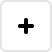
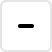
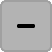
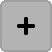
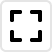
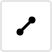
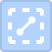
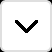
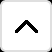
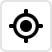
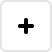
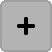
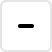
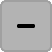
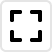
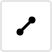
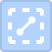
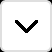
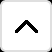
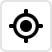

In [2]:
LetsPlot.setup_html()

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/refs/heads/master/data/mpg.csv")
print(df.shape)
df.head()

(234, 12)


,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## [Issue #1319](https://github.com/JetBrains/lets-plot/issues/1319) - `geom_boxplot`: unable to draw a y-oriented plot with `stat='identity'`

In [4]:
def get_issue1319_data():
    return {
        'cat': ['a', 'b'],
        'min': [-4, -2],
        'lower': [-2, -1],
        'middle': [0, 0],
        'upper': [2, 1],
        'max': [4, 2]
    }

ggplot(get_issue1319_data()) + \
    geom_boxplot(aes(y='cat', xmin='min', xlower='lower', xmiddle='middle', xupper='upper', xmax='max'), stat='identity')

## Orientation tests

In [5]:
def aes_name(col_name, swap):
    custom_names = {"lower": "xlower", "xlower": "lower",
                    "upper": "xupper", "xupper": "upper",
                    "middle": "xmiddle", "xmiddle": "middle"}
    if not swap:
        return col_name
    if col_name in custom_names:
        return custom_names[col_name]
    elif "x" == col_name[0]:
        return "y" + col_name[1:]
    elif "y" == col_name[0]:
        return "x" + col_name[1:]
    else:
        return col_name

def get_oriented_plot(geom, data, *, stat=None, swap=False, orientation=None, flip=False, mapping={}):
    generated_mapping = {aes_name(col_name, swap): col_name for col_name, col_values in data.items()}
    p = ggplot(data) + \
        geom(aes(**{**generated_mapping, **mapping}), stat=stat, orientation=orientation) + \
        ggtitle("{geom}():{swap}\nstat={stat}, orientation={o}{flip}{comment}".format(
            geom=geom.__name__,
            stat=stat,
            o=orientation,
            swap="\nmapping is inverse" if swap else "",
            flip="\ncoordinates are flipped" if flip else "",
            comment="\n[works if it can]" if swap and orientation != 'y' else "",
        ))
    if flip:
        p += coord_flip()
    return p

### Boxplot

#### Default stat

In [6]:
# no x

box_data1 = {
    'y': [55, 53, 49, 47, 56, 54, 50, 48],
    'fill': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data1),
    get_oriented_plot(geom_boxplot, box_data1, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data1, swap=True),
    get_oriented_plot(geom_boxplot, box_data1, flip=True),
    get_oriented_plot(geom_boxplot, box_data1, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data1, flip=True, swap=True),
], ncol=3)

In [7]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data1, orientation='y')

In [8]:
# x discrete, one value for each color

box_data2 = {
    'x': ['a'] * 8,
    'y': [55, 53, 49, 47, 56, 54, 50, 48],
    'fill': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data2),
    get_oriented_plot(geom_boxplot, box_data2, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data2, swap=True),
    get_oriented_plot(geom_boxplot, box_data2, flip=True),
    get_oriented_plot(geom_boxplot, box_data2, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data2, flip=True, swap=True),
], ncol=3)

In [9]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data2, orientation='y')

In [10]:
# x discrete, few values for each color

box_data3 = {
    'x': ['a'] * 8 + ['b'] * 4,
    'y': [-55, -53, -49, -47, -56, -54, -50, -48,
          -50, -49, -47, -46],
    'fill': ['p'] * 4 + ['q'] * 4 + ['p'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data3),
    get_oriented_plot(geom_boxplot, box_data3, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data3, swap=True),
    get_oriented_plot(geom_boxplot, box_data3, flip=True),
    get_oriented_plot(geom_boxplot, box_data3, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data3, flip=True, swap=True),
], ncol=3)

In [11]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data3, orientation='y')

In [12]:
# x continuous, one value for each color

box_data4 = {
    'x': [50] * 8,
    'y': [-102, -101, -99, -98, -103, -102, -100, -99],
    'fill': ['p'] * 4 + ['q'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data4),
    get_oriented_plot(geom_boxplot, box_data4, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data4, swap=True),
    get_oriented_plot(geom_boxplot, box_data4, flip=True),
    get_oriented_plot(geom_boxplot, box_data4, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data4, flip=True, swap=True),
], ncol=3)

In [13]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data4, orientation='y')

In [14]:
# x continuous, few values for each color

box_data5 = {
    'x': [95] * 8 + [105] * 4,
    'y': [55, 53, 49, 47, 56, 54, 50, 48,
          50, 49, 47, 46],
    'fill': ['p'] * 4 + ['q'] * 4 + ['p'] * 4,
}

gggrid([
    get_oriented_plot(geom_boxplot, box_data5),
    get_oriented_plot(geom_boxplot, box_data5, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data5, swap=True),
    get_oriented_plot(geom_boxplot, box_data5, flip=True),
    get_oriented_plot(geom_boxplot, box_data5, flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_data5, flip=True, swap=True),
], ncol=3)

In [15]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_data5, orientation='y')

#### `stat='identity'`

In [16]:
# no x

box_identity_data1 = {
    'ymin': [19, 20],
    'lower': [20, 21],
    'middle': [21, 22],
    'upper': [22, 23],
    'ymax': [23, 24],
    'fill': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', flip=True, swap=True),
], ncol=3)

In [17]:
# no x
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data1, stat='identity', orientation='y')

In [18]:
# x discrete, one value for each color

box_identity_data2 = {
    'x': ['a', 'a'],
    'ymin': [19, 20],
    'lower': [20, 21],
    'middle': [21, 22],
    'upper': [22, 23],
    'ymax': [23, 24],
    'fill': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', flip=True, swap=True),
], ncol=3)

In [19]:
# x discrete, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data2, stat='identity', orientation='y')

In [20]:
# x discrete, few values for each color

box_identity_data3 = {
    'x': ['a', 'a', 'b'],
    'ymin': [-23, -24, -21],
    'lower': [-22, -23, -20],
    'middle': [-21, -22, -19],
    'upper': [-20, -21, -18],
    'ymax': [-19, -20, -17],
    'fill': ['p', 'q', 'p'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', flip=True, swap=True),
], ncol=3)

In [21]:
# x discrete, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data3, stat='identity', orientation='y')

In [22]:
# x continuous, one value for each color

box_identity_data4 = {
    'x': [100, 100],
    'ymin': [19, 20],
    'lower': [20, 21],
    'middle': [21, 22],
    'upper': [22, 23],
    'ymax': [23, 24],
    'fill': ['p', 'q'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', flip=True, swap=True),
], ncol=3)

In [23]:
# x continuous, one value for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data4, stat='identity', orientation='y')

In [24]:
# x continuous, few values for each color

box_identity_data5 = {
    'x': [-90, -90, -110],
    'ymin': [-23, -24, -21],
    'lower': [-22, -23, -20],
    'middle': [-21, -22, -19],
    'upper': [-20, -21, -18],
    'ymax': [-19, -20, -17],
    'fill': ['p', 'q', 'p'],
}

gggrid([
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity'),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', swap=True),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', flip=True),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', flip=True, swap=True, orientation='y'),
    get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', flip=True, swap=True),
], ncol=3)

In [25]:
# x continuous, few values for each color
# only change the orientation, not the mappings
# NOTE: it's not expected to work
get_oriented_plot(geom_boxplot, box_identity_data5, stat='identity', orientation='y')

## Additional tests

### Tooltips

In [26]:
def get_boxplot_tooltips_plot(data, constants, *, swap=False, orientation=None, stat=None):
    mapping = {aes_name(col_name, swap): col_name for col_name, col_values in data.items()}
    scale_pos = scale_x_continuous if swap else scale_y_continuous
    tooltips = layer_tooltips()
    for aes_key in ["lower", "middle", "upper"]:
        swapped_aes_key = aes_name(aes_key, swap)
        tooltip_aes_key = "^" + swapped_aes_key
        tooltips = tooltips.line("{name} ({const}{formatted})|{tooltip_name}".format(
            name=swapped_aes_key,
            const="const" if aes_key in constants else "var",
            formatted="" if aes_key == "middle" else ", formatted",
            tooltip_name=tooltip_aes_key,
        ))
        if aes_key != "middle":
            tooltips = tooltips.format(tooltip_aes_key, "[{.1f}]")
    return ggplot(data, aes(**mapping)) + \
        geom_boxplot(stat=stat, orientation=orientation, tooltips=tooltips,
                     **{aes_name(k, swap): v for k, v in constants.items()}) + \
        scale_pos(format=".3f") + \
        ggtitle("{swap}stat={stat}, orientation={o}".format(
            stat=stat,
            o=orientation,
            swap="mapping is inverse\n" if swap else "",
        ))

box_constants3 = {'ymin': -57, 'lower': -56, 'middle': -53}
box_identity_constants3 = {'ymin': -25, 'lower': -24, 'middle': -23}
gggrid([
    get_boxplot_tooltips_plot(box_data3, box_constants3),
    get_boxplot_tooltips_plot(box_data3, box_constants3, swap=True),
    get_boxplot_tooltips_plot(box_data3, box_constants3, orientation='x'),
    get_boxplot_tooltips_plot(box_data3, box_constants3, swap=True, orientation='y'),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity'),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity', swap=True),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity', orientation='x'),
    get_boxplot_tooltips_plot(box_identity_data3, box_identity_constants3, stat='identity', swap=True, orientation='y'),
], ncol=2)

### Constants (regression)

In [27]:
gggrid([
    ggplot(box_data3, aes('x', 'y', fill='fill')) + \
        geom_boxplot(ymin=-57) + \
        scale_y_continuous(trans='symlog'),
    ggplot(box_data3, aes('y', 'x', fill='fill')) + \
        geom_boxplot(xmin=-57) + \
        scale_x_continuous(trans='symlog'),
    ggplot(box_identity_data3, aes(x='x', lower='lower', middle='middle', upper='upper', ymax='ymax', fill='fill')) + \
        geom_boxplot(stat='identity', ymin=-25) + \
        scale_y_continuous(trans='symlog'),
    ggplot(box_identity_data3, aes(y='x', xlower='lower', xmiddle='middle', xupper='upper', xmax='ymax', fill='fill')) + \
        geom_boxplot(stat='identity', xmin=-25) + \
        scale_x_continuous(trans='symlog'),
], ncol=2)

### Extra aesthetics

In [28]:
def extra_aes_plot(xs=None, ys=None):
    extra_data_x = {
        'ymin': [-104, -102],
        'lower': [-102, -101],
        'middle': [-100, -100],
        'upper': [-98, -99],
        'ymax': [-96, -98],
    }
    if xs is not None:
        extra_data_x['x'] = xs
    extra_data_y = {
        'xmin': [90, 94],
        'xlower': [95, 97],
        'xmiddle': [100, 100],
        'xupper': [105, 103],
        'xmax': [110, 106],
    }
    if ys is not None:
        extra_data_y['y'] = ys
    extra_data = {**extra_data_x, **extra_data_y}
    
    data_to_mapping = lambda d: {col: col for col, v in d.items()}
    extra_mapping_x = data_to_mapping(extra_data_x)
    extra_mapping_y = data_to_mapping(extra_data_y)
    extra_mapping = data_to_mapping(extra_data)
    
    print_mapping = lambda m, name: print("Mapping {0}:\n{1}\n".format(
        name,
        '\n'.join(["  {0}: {1}".format(k, v) for k, v in m.items()])
    ))
    print_mapping(extra_mapping_x, "extra_mapping_x")
    print_mapping(extra_mapping_y, "extra_mapping_y")
    print_mapping(extra_mapping, "extra_mapping")
    
    return gggrid([
        ggplot(extra_data_x, aes(**extra_mapping_x)) + geom_boxplot(stat='identity') + ggtitle("x"),
        ggplot(extra_data_y, aes(**extra_mapping_y)) + geom_boxplot(stat='identity') + ggtitle("y"),
        ggplot(extra_data, aes(**extra_mapping)) + geom_boxplot(stat='identity') + ggtitle("both"),
        ggplot(extra_data, aes(**extra_mapping)) + geom_boxplot(stat='identity', orientation='x') + ggtitle("both, orientation='x'"),
        ggplot(extra_data, aes(**extra_mapping)) + geom_boxplot(stat='identity', orientation='y') + ggtitle("both, orientation='y'"),
    ], ncol=3)

In [29]:
extra_aes_plot()

Mapping extra_mapping_x:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax

Mapping extra_mapping_y:
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax

Mapping extra_mapping:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax



In [30]:
extra_aes_plot(['a', 'b'], ['c', 'd'])

Mapping extra_mapping_x:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x

Mapping extra_mapping_y:
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y

Mapping extra_mapping:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y



In [31]:
extra_aes_plot([2, 4], [-3, -6])

Mapping extra_mapping_x:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x

Mapping extra_mapping_y:
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y

Mapping extra_mapping:
  ymin: ymin
  lower: lower
  middle: middle
  upper: upper
  ymax: ymax
  x: x
  xmin: xmin
  xlower: xlower
  xmiddle: xmiddle
  xupper: xupper
  xmax: xmax
  y: y



## [ggplot2-like examples](https://ggplot2.tidyverse.org/reference/geom_boxplot.html#ref-examples)

In [32]:
ggplot2_plot = ggplot(df, aes("class", "hwy"))
ggplot2_plot + geom_boxplot()

In [33]:
# Orientation follows the discrete axis
ggplot(df, aes("hwy", "class")) + geom_boxplot()

In [34]:
ggplot2_plot + geom_boxplot(varwidth=True)

In [35]:
ggplot2_plot + geom_boxplot(fill="white", color="#3366FF")

In [36]:
# By default, outlier points match the colour of the box. Use outlier_color to override
ggplot2_plot + geom_boxplot(outlier_color="red", outlier_shape=1)

In [37]:
# Remove outliers when overlaying boxplot with original data points
ggplot2_plot + geom_boxplot(outlier_color="transparent") + geom_jitter(width=0.2, seed=42)

In [38]:
# Boxplots are automatically dodged when any aesthetic is a factor
ggplot2_plot + geom_boxplot(aes(color="drv"))

In [39]:
# It's possible to draw a boxplot with your own computations if you use stat="identity":
def get_ggplot2_identity_data(*, seed=42):
    np.random.seed(seed)
    y = np.random.normal(size=100)
    return {
        'x': [1],
        'y0': [float(min(y))],
        'y25': [float(np.quantile(y, .25))],
        'y50': [float(np.median(y))],
        'y75': [float(np.quantile(y, .75))],
        'y100': [float(max(y))],
    }

ggplot(get_ggplot2_identity_data(), aes(x='x')) + \
    geom_boxplot(aes(ymin='y0', lower='y25', middle='y50', upper='y75', ymax='y100'),
                 stat='identity')